교안 `tf04-Keras_MLP_DNN.pdf`

### co-lab 준비

In [85]:
# from google.colab import drive
# drive.mount('/content/drive')

In [86]:
ROOT="./drive/MyDrive/Course_AI_2025/"

In [87]:
# !apt install fonts-nanum*

In [88]:
import matplotlib.pyplot as plt
# import matplotlib.pylab as plt
import matplotlib.font_manager as fm
%matplotlib inline

# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'  # Mac (AppleGothic 또는 AppleSDGothicNeo)
# plt.rcParams['font.family'] = 'NanumGothic' # Linux (NanumGothic 또는 다른 설치된 한글 폰트)

plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것
# plt.title('한글 타이틀...')

# 1. Deeplearning(DNN)

심층 신경망은 MLP 신경망을 사용해서 머신러닝을 수행하는 기술을 칭한다.



## MLP 와 DNN


#### - 다층신경망 MLP(Multi-Layer Perceptron)

- MLP에서는 신경망의 단일 은닉층을 여러개 사용한다.
 - 여러 개의 은닉층을 가진 신경망의 한 종류, 가장 기본적인 형태의 신경망.
 - 여러 개의 은닉층으로 단일 퍼셉트론의 한계 극복
 - 기존의 머신러닝 알고리즘으로 다루기 힘들었던 이미지, 음성, 텍스트 분야에서 뛰어난 성능을 발휘하면서 주목받고 있다.
 - 특징
   - 완전 연결(Fully Connected)
      -  MLP의 각 층의 뉴런들은 이전 층의 모든 뉴런들과 연결되어 있습니다.
   - 피드포워드(Feedforward)
      - 정보의 흐름이 입력층에서 출력층으로 한 방향으로만 진행됩니다.
 - 주요 용도: 분류, 회귀 등 다양한 머신러닝 문제에 활용됩니다.


여러 은닉층을 가진 MLP

<img src='https://i.imgur.com/DbwhpZ3.png' width=600>

#### -심층 신경망 (Deep Neural Network, DNN)

 - MLP의 한 종류로, 특히 여러 개의 은닉층을 포함하는 신경망을 의미
 - '심층(Deep)'이라는 단어는 은닉층의 수가 많다는 것을 강조.
 - DNN은 MLP의 특별한 경우로 보통 3개 이상의 은닉층을 가진 MLP를 DNN이라고 한다.
 - 특징:
    - 복잡한 패턴 학습
      - 은닉층이 깊어질수록 더 복잡하고 추상적인 특징들을 학습할 수 있는 능력이 있다.
    - 계층적 특징 학습
      - 각 층은 이전 층에서 학습한 특징들을 조합하여 더 고수준의 특징을 학습한다.
      -
 - 사용예: 이미지 인식에서 첫 층은 선이나 모서리 같은 기본 특징을, 다음 층은 이들을 조합하여 부분적인 형태를, 더 깊은 층은 얼굴이나 사물과 같은 복잡한 특징을 학습할 수 있습니다.


<img src='https://i.imgur.com/UxfCv5x.jpeg' width=600>

- 은닉층 : 입력층과 출력층 사이에 있는 모든 층
- 출력층에 적용하는 활성화 함수는 종류가 제한된다(이진 분류면 시그모이드, 다중 분류면 소프트맥스)
- 은닉층에 사용하는 활성화 함수는 비교적 자유롭다. (시그모이드, 볼 렐루 함수등이 사용됨)

#### -딥러닝

딥러닝은 머신러닝의 한 종류로 MLP 로 구성한다.
 - MLP 의 은닉층이 4개 이상으로 다수의 은닉층을 갖는다.

기존 머신러닝과 딥러닝의 가장 <span class="mark">큰 차이점은 **특징량 추출** 이다</span>. 일반적으로 머신러닝은 이미지 내부의 특징을 하나 하나 지정해야 한다. 딥러닝은 학습 데이터에서 기계가 자동으로 추출한다는 점이 다른다.

<div align='center'>
    <img src='https://www.softwaretestinghelp.com/wp-content/qa/uploads/2019/04/DeepLearning.png'>
    <div align='center'>소스: https://www.softwaretestinghelp.com/data-mining-vs-machine-learning-vs-ai/</p>
</div>

사과와 포도를 구분한다고 할 때, 머신러닝은 특징을 *색에 주목해서 구분하자* 같이 직접 특징을 지시하는 알고리즘에 집중해서 사용한다면. 딥러닝은 대량의 데이터를 학습 시키면 이런 특징을 기계가 찾아내는 것이다.

> Test
> - tensorflow 2.19
> - tensorflow 2.9
> - tensorflow 2.7

# 2 Keras로 DNN 만들기


keras 의 Sequencial 클래스를 사용해서 MLP, DNN 을 구성할 수 있다.

1. 입력데이터 이해
1. Sequencial 로 MLP 구성하기
2. Sequencial 생성자로 MLP 구성하기
3. Sequencial.add() 로 MLP 구성하기

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
import tensorflow as tf
# from tensorflow import keras  # 텐서플로 2.x 버전
import keras
from sklearn.model_selection import train_test_split

## (1)Fashin MNIST 데이터 세트

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋을 사용하겠습니다.

패션 MNIST 데이터셋은 10종류의 패션 아이템으로 구성되어 있다.

 - MNIST 데이터는 손으로 쓴 0 ~ 9 까지의 숫자로 이루어져 있다.
 - 패션 MNIST는 MNIST와 크기, 개수가 동일하지만 숫자 대신 패션 아이템으로 이루져있다.



이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냅니다:

<div align='center'>
  <img src="https://tensorflow.org/images/fashion-mnist-sprite.png" alt="Fashion MNIST sprite" width="400">   
  <div align="center">     <b>그림 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br>{nbsp}   </div>
</div>



TensorFlow에서 직접 [Fashion MNIST 데이터](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)를 가져오고 로드합니다.

In [91]:
(train_images, train_labels), (test_images, test_labels) = \
    keras.datasets.fashion_mnist.load_data()

In [92]:
train_images.shape, train_labels.shape


((60000, 28, 28), (60000,))

In [93]:
test_images.shape, test_labels.shape


((10000, 28, 28), (10000,))

크기가 28 x 28이다 보니 꽤 작고 흐릿하다. 신발과 다양한 종류의 옷들이 보인다.


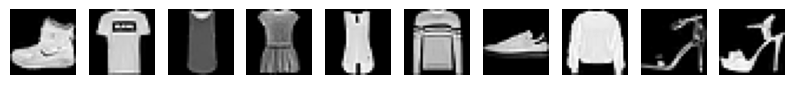

In [94]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_images[i], cmap='gray')
    axs[i].axis('off')
plt.show()

패션 MNIST의 타깃은 0 ~ 9까지의 숫자 레이블로 구성된다. 각 숫자의 의미는 아직 모르지만 마지막 2개의 샘플이 같은 레이블(5)를 가지고 있다. 패션 MNIST에 포함된 10개의 레이블의 의미는 다음과 같다.

0 : 티셔츠
1 : 바지
2 : 스웨터
3 : 드레스
4 : 코트
5 : 샌달
6 : 셔츠
7 : 스니커즈
8 : 가방
9 : 앵클 부츠

In [95]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

마지막으로 넘파이 unique() 함수로 레이블 당 샘플 개수를 확인해 보자.

In [96]:
# 전체 학습 데이터 타겟의 라벨만 출력
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

이미지의 픽셀값을 0 ~ 255 범위에서 0 ~ 1 사이로 변환하고, 28 x 28 크기의 2차원 배열을 784 크기의 1차원 배열로 펼친다.



In [97]:
train_images.max()

255

In [98]:
# 정규화
train_scaled = train_images / 255.0

In [99]:
train_scaled.min(), train_scaled.max()

(0.0, 1.0)

In [100]:
# 28x28 이미지를 784개 벡터로 변경
train_scaled = train_scaled.reshape(-1, 28*28)

In [101]:
train_scaled.shape

(60000, 784)

### \[로지스틱 회귀로 패션 아이템 분류하기\]



> 머신러닝 LogisticRegressor 로 SGDClassifier 클래스와 cross_validate 함수를 사용해 이 데이터에서 교차 검증으로 성능을 확인두고 DNN 의 결과와 비교해 보자

In [102]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_labels, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8262833333333333


/opt/anaconda3/envs/stenv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/stenv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/stenv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/envs/stenv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/e

위에선 반복 횟수를 5로 지정하였다. 반복 횟수를 늘려도 크게 향상 되지는 않는다.

### \[입력 데이터 이해\]



이미지 28x28 이미지의 픽셀 784를 입력으로 받아서 분류하는 심층 신경망을 구성한다.

<img src='https://i.imgur.com/LeqDB0g.jpeg' height=300>

심층 신경망은 MLP 층을 수평적으로 배치하는 구조


- 2개 이상의 MLP 층 네트워크로 배치한 심층 신경망.
- 다층 인공 신경망, 심층 신경망, 딥러닝을 같은 의미로 사용하기도 한다.



클래스가 총 10개이기 때문에 z10 까지 계산한다. z1 ~ z10을 계산하고 이를 바탕으로 클래스를 예측하기 때문에 신경망의 최종 값을 만든다는 의미에서 출력층이라고 한다.



 픽셀이 총 784개 이고 출력층은 총 10개이다. 이것들이 모두 연결된 선을 생각해보면 784 x 10 = 7840 개의 연결된 선이 있다. 정말 빽빽하기 때문에 밀집층이라고 부른다.
 - 밀집층은 양쪽의 뉴런이 모두 빽빽하게 연결된 층으로, 완전 연결층이라고도 부른다.

<img src='https://i.imgur.com/Tv0g0at.jpeg' width=600>

- 출력층 : z1 ~ z10에 해당, 클래스를 예측하여 신경망의 최종값을 만드는 층
- 뉴런 : z의 값을 계산하는 단위, 현재는 유닛이라 부르는 사람이 더 많아지고 있다.
- 입력층 : x1~x784에 해당, 픽셀값 그 자체이며 계산을 수행하진 않는다.

가장 기본적인 인공 신경망(MDP)은 확률적 경사 하강법을 사용하는 로지스틱 회귀와 같다. 그렇다면 어떻게 인공 신경망으로 성능을 높일 수 있는 걸까?

 - 은닉층에서 입력을 서로 교차해서 다음 은닉층으로 전달하며 높아진다.



은닉층에 왜 활성화 함수를 적용할까? 은닉층에선 선형적인 산술 계산만 수행한다면 수행 역할이 없는 셈이다. 선형 계산을 적당하게 비선형적으로 비틀어 주어야 한다. 그래야 다음 층의 계산과 단순히 합쳐지지 않고 나름의 역할을 할 수 있다.

### 훈련 / 검증세트 분할

 사이킷런의 train_test_split() 함수로 훈련 세트와 검증 세트로 나눈다.

In [103]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_labels, val_target = train_test_split(
    train_scaled, train_labels, test_size=0.2, random_state=42)

## (2) Sequancial이용 MLP 구성하기


Dense Layer 객체를 준비하고 Sequencial 생성자로 MLP 를 구성한다.


```python
class Dense(
    units: int,
    activation: Any | None = None,
    use_bias: bool = True,
    ...
)
```

```python
class Sequential(
    layers: Any | None = None,
    trainable: bool = True,
    name: Any | None = None
)
```

이제 인공 신경망 모델에 층을 추가해 보자.
 - 입력층과 출력층 사이에 밀집층이 추가된다.
 - 입력층과 출력층 사이에 있는 모든 층을 은닉층이라고 부른다.
 - 은닉층에는 활성화 함수가 있다.
   - 은닉층의 활성화 함수, 시그모이드 함수와 렐루 함수등을 사용한다.
 - 출력층에 적용하는 활성화 함수는 종류가 제한되어 있다.
   - 이진 분류일 경우 시그모이드 함수를 사용하고 다중 분류일 경우 소프트맥스 함수를 사용한다.



In [104]:
input = keras.layers.Input(shape=(784,))

In [105]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')    # 다중분류: 10개

- 입력의 크기를 (784,)로 지정했다.
- dens1이 은닉층이고 100개의 뉴런을 가진 밀집층이다. 활성화 함수를 sigmoid 했다.
- 은닉층의 뉴런 개수를 정하는데는 특별한 기준이 없다.
   - 한 가지 제약 사항이 있다면 출력층의 뉴런보다는 많게 한다.
   - 클래스 10개에 대한 확률을 예측해야 하는데 이전 은닉층의 뉴런이 10개보다 적다면 부족한 정보가 전달될 것이다.
- 그다음 dense2는 출력층이다. 10개의 클래스를 분류하므로 10개의 뉴런을 두었고 활성화 함수는 소프트맥스 함수로 지정했다.

### Sequencial Layer

이제 앞에서 만든 dense1과 dense2 객체를 Sequential 클래스에 추가하여 심층 신경망을 만들어 보자.

In [106]:
model = keras.Sequential([input, dense1, dense2])

Sequential 클래스의 객체를 만들 때 여러 개의 층을 추가하려면 위와 같이 리스트로 만들어 전달한다. 여기서 주의할 것은 출력츠을 가장 마지막에 두어야 한다는 것이다. 이 리스트는 가장 처음 등장하는 은닉층에서 마지막 출력층의 순서로 나열해야 한다.

인공 신경망의 강력한 성능은 바로 이렇게 층을 추가하여 입력 데이터에 대해 연속적인 학습을 진행하는 능력에서 나온다. 물론 2개 이상의 층을 추가할 수도 있다.



### summary이용 파라미터 해석

이렇게 구성된 네트워크의 입력, Dense 레이어, 출력의 파라미터 수는 summary() 함수를 통해 확인할 수 있고,

 - 층의 파라미터는 ***`(입력측 뉴런 수 + 1) x (출력측 뉴런 수)`*** 식으로 구한다.


머신러닝에서 함수 $y = ax + b$ 는 아래 같이 가중치와 편향을 고려하고 있다. 은닉층의 입력과 출력은 h(x) 함수 같이 가중치와 편향을 함께 계산한다.

$$
y = wx + b \\
h(x) = wx + b
$$

이것은 머신러닝의 은닉층 연산은 바이어스도 1개의 노드로 계산해서 `+1`을 한다.

hidden layer params:

```
1st params = (input(784) + bias(1)) * output(100) = (784 + 1) * 100 = 78,500
2st params = (input(100) + bias(1)) * output(10) = (100 + 1) * 10 = 1010
```

케라스는 모델의 summary() 메서드를 호출하면 층에 대한 유용한 정보를 얻을 수 있다.

In [107]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

모델의 구조 summary() :


 - Layer (type): 은닉층 이름과 종류
 - Output Shape: (None, 100) : 출력되는 배열의 첫 번째 차원을 배치 차원이으로, None으로 지정되는 이유는 배치 크기가 동적으로 추가될 수 있어서 None으로 둔다.
 -  Param : 층에서 계산할 인자의 수. 아래 파라미터 입력과 출력 이해 참고.

맨 첫줄에는 모델의 이름이 나온다. 그다음 이 모델에 들어 있는 층이 순서대로 나열된다. 이 순서는 맨 처음 추가한 은닉층에서 출력층의 순서대로 나열된다. 층마다 층 이름, 클래스, 출력 크기, 모델 파라미터 개수가 출력된다. 층을 만들 때 name 매개변수로 이름을 지정할 수 있다. 층 이름을 지정하지 않으면 케라스가 자동으로 'dense'라고 이름을 붙인다.

출력 크기를 보면 (None, 100)이다. 첫 번째 차원은 샘플의 개수를 나타낸다. 샘플의 개수가 아직 정의되어 있지 않기 때문에 None이다. 왜 그럴까? 케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한 번에 모두 사용하지 않고 잘게 나누어 여러 번에 걸쳐 경사 하강법 단계를 수행한다. 바로 미니배치 경사 하강법이다.

케라스의 기본 미니배치 크기는 32개이다. 이 값은 fit() 메서드에서 batch_size 매개변수로 바꿀 수 있다. 따라서 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 None으로 설정한다. 이렇게 신경망 층에 입력되거나 출력되는 배열의 첫 번째 차원을 배치 차원이라고 부른다.



***마지막으로 모델 파라미터 개수가 출력된다. 이 층은 Dense 층이므로 입력 픽셀 784개와 100개의 모든 조합에 대한 가중치가 있다. 그리고 뉴런마다 1개의 절편이 있다. 따라서 총 78500개 이다***.

두 번째 층의 출력 크기는 (None,10)이다. 배치 차원은 동일하게 None이고 출력 뉴런 개수가 10개이기 때문이다. 이 층의 모델 파라미터 개수는 1010개이다.

summary() 메서드의 마지막에는 총 모델 파라미터 개수와 훈련되는 파라미터 개수가 동일하게 79510으로 나온다. 그 아래 훈련되지 않는 파라미터는 0으로 나온다. 간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층이 있다. 이런 층의 파라미터 개수가 여기에 나온다.

In [108]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [109]:
model.fit(train_scaled, train_labels, epochs=10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.7515 - loss: 0.7683
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.8449 - loss: 0.4264
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - accuracy: 0.8627 - loss: 0.3765
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - accuracy: 0.8708 - loss: 0.3521
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - accuracy: 0.8786 - loss: 0.3350
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.8825 - loss: 0.3198
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.8871 - loss: 0.3102
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8922 - loss: 0.2999
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step - accuracy: 0.8948 - loss: 0.2878
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.9010 - loss: 0.2746


In [110]:
1500 * 32

48000

In [111]:
loss, accuracy = model.evaluate(val_scaled, val_target)
print(loss, accuracy)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8864 - loss: 0.3182
0.320815771818161 0.8833333253860474


### Sequencial 생성자에 직접

모델을 훈련하기 전에 Seqeuntial 클래스에 층을 추가하는 다른 방법을 알아보자. 다음처럼 Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만드는 경우가 많다.

In [112]:
model = keras.Sequential([
    keras.layers.Input((784,)),
    keras.layers.Dense(100, activation='sigmoid', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name="패션 MNIST")

위와 같이 작업하면 아래처럼 추가되는 층을 한눈에 쉽게 알아보는 장점이 있다. 모델의 이름과 달리 층의 이름은 반드시 영문이어야 한다.

In [113]:
model.summary()

Model: "패션 MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

2개의 Dense 층이 이전과 동일하게 추가되었고 파라미터 개수도 같다. 바뀐 것은 모델 이름과 층 이름이다. 여러 모델과 많은 층을 사용할 때 name 매개변수를 구분하기 쉽다. 이 방법이 편리하지만 아주 많은 층을 추가하려면 Sequential 클래스 생성자가 매우 길어진다. 또 조건에 따라 층을 추가할 수도 없다.

### Sequencial.add()로 구성하기

Sequential 클래스에서 층을 추가할 때 가장 널리 사용하는 방법은 모델의 add() 메서드이다.

In [114]:
model = keras.Sequential(name="패션 MNIST")
model.add(keras.layers.Input((784,)))
model.add(keras.layers.Dense(100, activation='sigmoid', name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

여기에서도 Dense 클래스의 객체를 따로 변수에 담지 않고 바로 add() 메서드로 전달한다. 이 방법은 한눈에 추가되는 층을 볼 수 있고 프로그램 실행 시 동적으로 층을 선택하여 추가할 수 있다.

In [115]:
model.summary()

Model: "패션 MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

### 함수형 모델 선언

In [116]:
input = keras.layers.Input((784,))
hidden = keras.layers.Dense(100, activation='sigmoid')(input)
output = keras.layers.Dense(10, activation='softmax')(hidden)

model = keras.Model(inputs=input, outputs = output)

In [117]:
type(hidden)

keras.src.backend.common.keras_tensor.KerasTensor

In [118]:
type(model)

keras.src.models.functional.Functional

## (3)모델 컴파일 과 훈련

모델의 [*컴파일*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)

```Python
def compile(
    optimizer: str = "rmsprop",
    loss: Any | None = None,
    loss_weights: Any | None = None,
    metrics: Any | None = None,
    weighted_metrics: Any | None = None,
    run_eagerly: bool = False,
    steps_per_execution: int = 1,
    jit_compile: str = "auto",
    auto_scale_loss: bool = True
)
```


- [*손실 함수*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.
- [*옵티마이저*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.
- [*메트릭*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) — 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 *정확도*를 사용합니다.

#### -손실함수
  -  분류를 위한 손실함수 사용
  - 이진 분류에서 이진 크로스 엔트로피 함수를 사용
  - 다중 분류에서는 크로스 엔트로피 손실 함수를 사용한다.
     - sparse_ 단어는 이진 크로스 엔트로피 손실을 위해 -log(예측확률)에 타깃값(정답)을 곱했다.

#### - Metrics 측정 지표


 - 케라스는 모델이 훈련할 때 기본으로 에포크마다 손실 값을 출력해 준다.
 - 손실에 대해 다양한 출력을 위해 metrics 에 지표를 추가
    - accuracy
    - val_accuracy

In [119]:
model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'])


신경망 모델을 훈련하려면 다음 단계가 필요합니다.

1. 훈련 데이터를 모델에 주입합니다-이 예에서는 `train_images`와 `train_labels` 배열입니다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
3. 테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 `test_images` 배열입니다. 이 예측이 `test_labels` 배열의 레이블과 맞는지 확인합니다.
4. 예측이 `test_labels` 배열의 레이블과 일치하는지 확인합니다.


이제 모델을 훈련해 보자 fit() 을 사용한다.

```Python
def fit(
    x: Any | None = None,
    y: Any | None = None,
    batch_size: Any | None = None,
    epochs: int = 1,
    callbacks: Any | None = None,
    validation_split: float = 0,
    validation_data: Any | None = None,
    ...
```

batch_size
 - 케라스의 기본 미니배치 크기는 32개이다.
 - fit(batch_size) 매개변수로 바꿀 수 있다.

epochs
 - 한 배치가 실행되는 반복 횟수

In [120]:
model.fit(train_scaled, train_labels, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - accuracy: 0.7576 - loss: 0.7635
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.8495 - loss: 0.4175
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.8605 - loss: 0.3847
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - accuracy: 0.8686 - loss: 0.3621
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.8775 - loss: 0.3350


케라스는 친절하게 에포크마다 걸린 시간과 손실 정확도를 출력해 준다. 5번 반복에 정확도가 85%를 넘었다.

Keras 는 신경망에 몇 개의 층을 추가하더라도 compile() 메서드와 fit() 메서드의 사용법은 동일하다. 이것이 케라스 API의 장점이다.



그럼 앞서 따로 떼어놓은 검증 세트에서 모델의 성능을 확인해 보자. 케라스에서 모델의 성능을 평가하는 메서드는 evaluate() 메서드이다.

In [121]:
loss, accuracy = model.evaluate(val_scaled, val_target)
print(loss, accuracy)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.8744 - loss: 0.3510
0.35312750935554504 0.8725833296775818


비교군인 로지스틱회귀 결과에 비해서도 높게 나온다

# 3.Flatten 층 사용 모델 만들기

모델의 출력을 구성하기  Full connected layer 를 구성하면 이전에는 Flatten layer를 통해서 3차원이었던 벡터를 1차원으로 shape을 바꿔주었다.

패션 MNIST 데이터는 28 x 28 크기이기 때문에 인공 신경망에 주입하기 위해 넘파이 배열의 reshape() 메서드를 사용해 1차원으로 펼쳤다. 직접 이렇게 1차원으로 펼쳐도 좋지만 케라스에서는 이를 위한 Flatten 층을 제공한다.


<img src='https://velog.velcdn.com/images%2Foch9854%2Fpost%2F6e230814-c1c6-49e3-a853-4f89a72d0ca6%2Fimage.png' width=500>

### - Flatten 클래스

사실 Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 한다. 입력에 곱해지는 가중치나 절편이 없다. 따라서 인공 신경망의 성능을 위해 기여하는 바는 없다. 하지만 Flatten 클래스를 층처럼 입력층과 은닉층 사이에 추가하기 때문에 이를 층이라 부른다.

In [122]:
model = keras.Sequential()
model.add(keras.layers.Input((28, 28)))
# flatten layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

### - ReLU 활성화 함수

초창기 인공 신경망의 은닉층에 많이 사용된 활성화 함수는 시그모이드 함수였다. 하지만 이 함수에는 단점이 있다. 이 함수의 오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있기 때문에 올바른 출력을 만드는데 신속하게 대응하지 못한다.

특히 층이 많은 심층 신경망일수록 그 효과가 누적되어 학습을 더 어렵게 만든다. 이를 개선하기 위해 다른 종류의 활성화 함수가 제안되었다. 바로 렐루 함수이다. 렐루 함수는 아주 간단하다. 입력이 양수일 경우 마치 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고 음수일 경우에는 0으로 만든다.



<img src='https://i.sstatic.net/itkXP.png' width=500>

렐루 함수는 max(0,z)와 같이 쓸 수 있다. 이 함수는 z가 0보다 크면 z를 출력하고 z가 0보다 작으면 0을 출력한다. 렐루 함수는 특히 이미지 처리에서 좋은 성능을 낸다고 알려져 있다.

은닉층의 활성화 함수에 시그모이드 함수 대신 렐루 함수를 적용하기 전에 케라스에서 제공하는 편리한 층 하나를 더 살펴보자.


In [123]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

첫 번째 등장하는 Flatten 클래스에 포함된 모델 파라미터는 0개이다. 케라스의 Flatten 층을 신경망 모델에 추가하면 입력값의 차원을 짐작할 수 있는 것이 또 하나의 장점이다. 앞의 출력에서 784개의 입력이 첫 번째 은닉층에 전달된다는 것을 알 수 있다. 이는 이전에 만들었던 모델에서는 쉽게 눈치채기 어려웠다. 입력 데이터에 대한 전처리 과정을 가능한 모델에 포함시키는 것이 케라스 API의 철학 중 하나이다.

In [124]:
(train_images, train_labels), (test_images, test_labels) = \
    keras.datasets.fashion_mnist.load_data()

In [125]:
train_scaled = train_images / 255.0

In [126]:
train_scaled, val_scaled, train_labels, val_labels = train_test_split(
    train_scaled, train_labels, test_size=0.2, random_state=42)

In [127]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [128]:
history = model.fit(train_scaled, train_labels, epochs=5, validation_split=.2)

Epoch 1/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.7605 - loss: 0.6999 - val_accuracy: 0.8142 - val_loss: 0.4951
Epoch 2/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - accuracy: 0.8479 - loss: 0.4238 - val_accuracy: 0.8452 - val_loss: 0.4085
Epoch 3/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.8661 - loss: 0.3720 - val_accuracy: 0.8436 - val_loss: 0.4312
Epoch 4/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.8791 - loss: 0.3481 - val_accuracy: 0.8532 - val_loss: 0.3970
Epoch 5/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.8862 - loss: 0.3188 - val_accuracy: 0.8765 - val_loss: 0.3436


In [129]:
loss, accuracy = model.evaluate(val_scaled, val_target)
loss, accuracy

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.8797 - loss: 0.3486


(0.35116586089134216, 0.8758333325386047)

# 4. Batch 와 history

배치학습에서는 훈련자료 J를 구성하는 관측값 N개가 모두 투입된 후에 가중치의 갱신이 이루어진다. 이때 관측값 N개가 한차례 모두 투입되는 것을 1회 에포크로 정의한다.




즉, 배치학습을 위한 비용함수는 평균오차함수 $E_{av}(N)$이며, 가중치의 갱신은 에포크마다 한 번씩 이루어진다.  따라서 에포크마다 가중치의 갱신이 끝나면 $E_{av}(N)$ 을 계산하여 미리 정한 최대 에포크까지 학습곡선을 그릴 수 있다. 사실 에포크마다 학습을 위해 훈련자료 J의 관측값들을 무작위로 뒤섞는다. 학습곡선은 각 에포크 회수에 대해 $E_{av}(N)$값을 그린 곡선이다.

<img src='https://i.imgur.com/i3AKzZ8.jpeg' width=500>

딥러닝 모델은 한 번에 전체 데이터를 처리하지 않고 데이터를 작은 배치(batch) 단위로 나누어 처리한다.

배치 단위는 데이터를 아래 같인 배치 크기 만큼씩 잘라서 학습 이포크에서 사용한다.

```python
#크기 128인 배치
batch = train_images[:128]

#다음 크기 128인 배치
batch = train_images[128:256]
#n번째 배치
n = 10
batch = train_images[128 * n:128 * (n+1)]
```

#### 학습과 history 객체

In [130]:
history = model.fit(train_scaled, train_labels, epochs=5, batch_size=64)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.8897 - loss: 0.3071
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.8984 - loss: 0.2876
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.9005 - loss: 0.2724
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.9022 - loss: 0.2657
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9042 - loss: 0.2620


앞서 시그모이드 함수를 사용했을 때와 비교하면 성능이 크지 않지만 조금 향상 되었다. 그럼 검증 세트에서의 성능도 확인해 보자.

In [131]:
loss, accuracy = model.evaluate(val_scaled, val_target)
loss, accuracy

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.8810 - loss: 0.3561


(0.35750070214271545, 0.8790833353996277)

인공신경망과 비교하면 은닉층을 추가하지 않은 경우보다 몇 퍼센트 성능이 향상되었다.

### history 객체로 손실율 추적

fit 에 반환되는 history 에는 `history.history` 딕트 속성에 손실/정확도 듣의 metircs 지표 값이 저장되어 있다.

In [132]:
type(history)

keras.src.callbacks.history.History

In [133]:
history.history

{'accuracy': [0.8913124799728394,
  0.8965208530426025,
  0.898479163646698,
  0.9033125042915344,
  0.9051666855812073],
 'loss': [0.30153799057006836,
  0.28810614347457886,
  0.277700275182724,
  0.26732996106147766,
  0.2599102854728699]}

In [134]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

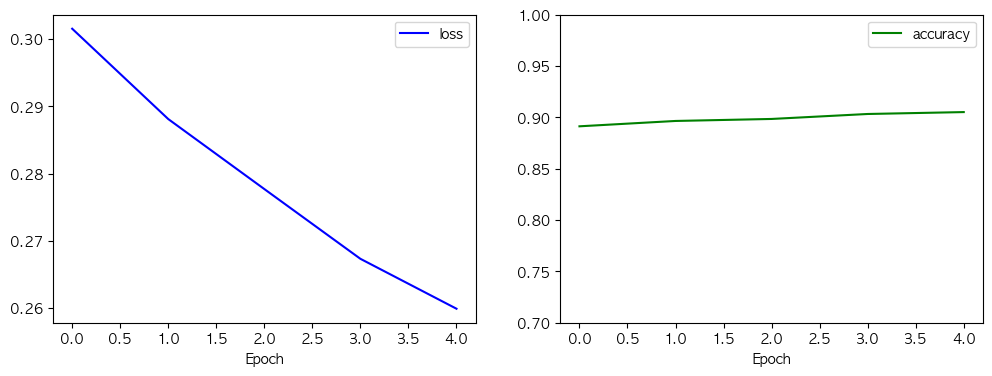

In [135]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
# plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
# plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')


plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

# 6.손실함수

손실함수는 실제값과 예측 값 차이를 측정하는 함수로 회귀와 분류에 따라 다르다



회귀는 평균제곱과 교차엔트로피로 사용할 수 있다.

1. 평균제곱 계열
    - mean_squared_error : 평균제곱오차
    - mean_absolute_error : 평균절대오차. 실제 값과 예측 값 차이의 절대값 평균
    - mean_absolute_percentage_error: 평균 절대 백분율 오차. 절대값 오차를 절대값으로 나눈 후 평균
    - mean_squared_logarithimc_error : 평균 제곱 로그 오차. 실제 값과 예측 값에 로그를 적용한 값의 차이를 제곱한 값의 평균




분류에는 교차 엔트로피 계열을 사용할 수 있다.

2. 교차 엔트로피
  - 교차엔트로피 함수는 출력 값에 로그를 취해서 오차가 커지면 수렴 속도가 빨라지고 오차가 작아지면 속도가 감소하게 만든것이다.
  - categorical_crossentropy: 범주형교차엔트로피. 분류.
  - sparse_categorical_crossentropy: 범주형 확률교차엔트로피. 분류.
  - binary_crossentropy(이항교차엔트로피): 0, 1을 선택하는 경우.

### - Crossentropy

크로스 엔트로피는 확률부부분에 p(x) 를 곱한것과 달리 로그 뒤에는 q(x)를 곱하는데 q(x)는 분류 네트워크가 예측한 라벨의 확률 값이다.

<img src='https://i.imgur.com/zaSh7yb.jpeg' width=600>

 - p(x)는 정답 라벨, q(x)는 분류 네트워크 계산 결과인 예측 라벨
 - 이미지: https://davinci-ai.tistory.com/28


참고 정보이론 자료의 [참고-정보이론#Cross Entroy](../참고-정보이론.ipynb?download=false#Cross-entropy)


분류에서 p(x), q(x)에 해당하는 범주는 2개 이상이다. 이에 대한 해결책은 모든 범주에 대한 평균을 내는 것으로 범주 수를 n으로 하면 범주에 대한 크로스 엔트로피(Categorical Cross Entropy, CCE) 식은

$$CCE = -\frac{1}{n} \sum_{j=1}^n p(x) \log q(x)
$$

이 식에 따라 위 그림을 계산해 보면

$$CCE_1 = -\frac{1}{2} (1.0 \times \log0.87 + 0.0 \times \log 0.13) = 0.0696
$$

이 값만 보면 CCE 가 높은지 낮은지 가늠이 어렵다. 비교를 위해 다른 경우르 ㄹ가정해 보면, 정답이 화이트 와인 일 때 레드 와인일 확률을 0.6, 화이트 와인일 확률을 0.4로 예측하는 경우가 있다면 정답보다 오답에 가깝게 예측하기 때문에 그림 보다 예측을 못하는 경우라고 생각해 볼 수 있다. 실제 그런지 CCE를 계산해 보자,


$$CCE_2 = -\frac{1}{2} (0.0 \times \log0.6 + 1.0 \times \log 0.4) = 0.4581
$$

두번째 경우 CCE는 0.4581로 그림의 0.06696보다 6.5배 높아졌다. CCE도 손실의 일종으로 낮을 수록 좋은 값이고, 네트워크는 손실을 낮추기 위해서 노력한다. 즉 CCE가 낮을 수록 예측을 잘하는 네트워크인것이다.

정달 라벨은 늘 1.0 이고 오답 라벨은 언제나 0.0 이므로 오답 라벨에 곱해지는 값은 버려진다. 그래서 위 식은 정답 라벨만 남겨두어도 달라지지 않는 다.


$$CCE_1 = -\frac{1}{2} (1.0 \times \log0.87 ) = 0.0696
\\
CCE_2 = -\frac{1}{2} (1.0 \times \log0.4) = 0.4581
$$

#### Crossentropy 사용

이진 분류에선 출력층의 뉴런이 하나이다. 이 뉴런이 출력하는 확률값 a(시그모이드 함수의 출력값)를 사용해 양성 클래스와 음성 클래스에 대한 크로스 엔트로피를 계산한다. 이진 분류의 출력 뉴런은 오직 양성 클래스에 대한 확률(a)만 출력하기 때문에 음성 클래스에 대한 확률은 1-a로 구할 수 있다. 역시 이진 분류의 타깃값은 양성 샘플을 경우에는 1, 음성 샘플일 경우에는 0이다. 0을 곱하면 어떤 계산이든지 모두 0이 되기 때문에 특별히 음성 샘플일 경우 1로 바꾸어(1-타깃값) 계산한다.


그럼 패션 MNIST 데이터셋과 같이 다중 분류일 경우엔 어떻게 계산을 할까? 출력층은 10개의 뉴런이 있고 10개의 클래스에 대한 확률을 출력한다. 첫 번째 뉴런은 티셔츠일 확률이고 두 번째 뉴런은 바지일 확률을 출력하자. 이진 분류와 달리 각 클래스에 대한 확률이 모두 출력되기 때문에 타깃에 해당하는 확률만 남겨 놓기 위해서 나머지 확률에는 모두 0을 곱한다.

예를 들어 샘플이 티셔츠일 경우 첫 번째 뉴런의 활성화 함수 출력인 a1에 크로스 엔트로피 손실 함수를 적용하고 나머지 활성화 함수 출력 a2 ~ a10 까지는 모두 0으로 만든다. 결국 신경망은 티셔츠 샘플에서 손실을 낮추려면 첫 번째 뉴런의 활성화 출력 a1의 값을 가능한 1에 가깝게 만들어야 한다. 이것이 바로 크로스 엔트로피 손실 함수가 신경망에 원하는 바이다.

예를 하나더 들어보자. 샘플이 바지일 경우는 두 번째 뉴런의 활성화 출력인 a2만 남겨야 한다. 그러려면 두 번째 원소만 1이고 나머지는 모두 0으로 타깃값을 준비하면 된다. 바지 샘플을 정확하게 분류하려면 신경망이 a2의 출력을 가능한 한 높여야 한다. 이와 같이 타깃값을 해당 클래스만 1이고 나머지는 모두 0인 배열로 만드는 것을 원-핫 인코딩 이라고 부른다.

따라서 다중 분류에서 크로스 엔트로피 손실 함수를 사용하려면 0,1,2 와 같이 정수로 된 타깃값을 원-핫 인코딩으로 변환해야 한다.

In [136]:
train_labels[:10]

array([7, 3, 5, 8, 6, 9, 3, 3, 9, 9], dtype=uint8)

패션 MNIST 데이터 타깃값은 위와 같이 모두 정수로 되어 있다. 하지만 텐서플로에서는 정수로 된 타깃값을 원-핫 인코딩으로 바꾸지 않고 그냥 사용할 수 있다. 정수로된 타깃값을 사용해 크로스 엔트로피 손실을 계산하는 것이 바로 'sparse_categorical_crossentropy'이다.

> 타깃값을 원-핫 인코딩으로 준비했다면 compile() 메서드에 손실 함수를 loss='categorical_crossentropy'로 지정한다.


### - 손실함수 클래스

손실함수는 손실함수 객체에 정의된 이름으로도 사용할 수 있다.

loss 도 클래스로 선언해 사용해 보자

```Python
optimizer = tf.keras.optimizers.Adam(lr=0.01)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

metric = tf.keras.metrics.MeanSquaredError()
metric = tf.keras.metrics.Accuracy()
```

In [137]:
model = keras.Sequential()
model.add(keras.layers.Input((28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [138]:
loss = keras.losses.SparseCategoricalCrossentropy()
metric = keras.metrics.SparseCategoricalAccuracy()
# metric = keras.metrics.Accuracy()

# model.compile(loss=loss, metrics=[metric])
model.compile(loss=loss, metrics=['accuracy'])
# model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [139]:
history = model.fit(train_scaled, train_labels, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.7583 - loss: 0.6858
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.8532 - loss: 0.4056
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step - accuracy: 0.8717 - loss: 0.3585
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.8776 - loss: 0.3367
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step - accuracy: 0.8849 - loss: 0.3200


In [140]:
print("\검증 데이터로 모델 평가:")
loss, accuracy = model.evaluate(val_scaled, val_labels)
print(f"테스트 손실: {loss:.4f}")
print(f"테스트 정확도: {accuracy:.4f}")

\검증 데이터로 모델 평가:
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8695 - loss: 0.3651
테스트 손실: 0.3660
테스트 정확도: 0.8695


In [141]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

### - Validation 학습

검증용 데이터는 fit 실행시 validation_split, validation_data 사용시 검증 데이터가 사용되고 metrics 지표에도 검증용이 추가된다.

In [142]:
model = keras.Sequential()
model.add(keras.layers.Input((28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [143]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_labels,
                    epochs=5,
                    validation_split=.2)

Epoch 1/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.7531 - loss: 0.7092 - val_accuracy: 0.8521 - val_loss: 0.4168
Epoch 2/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.8496 - loss: 0.4219 - val_accuracy: 0.8586 - val_loss: 0.3878
Epoch 3/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.8644 - loss: 0.3748 - val_accuracy: 0.8696 - val_loss: 0.3657
Epoch 4/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - accuracy: 0.8733 - loss: 0.3441 - val_accuracy: 0.8757 - val_loss: 0.3496
Epoch 5/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.8854 - loss: 0.3217 - val_accuracy: 0.8695 - val_loss: 0.3647


In [144]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

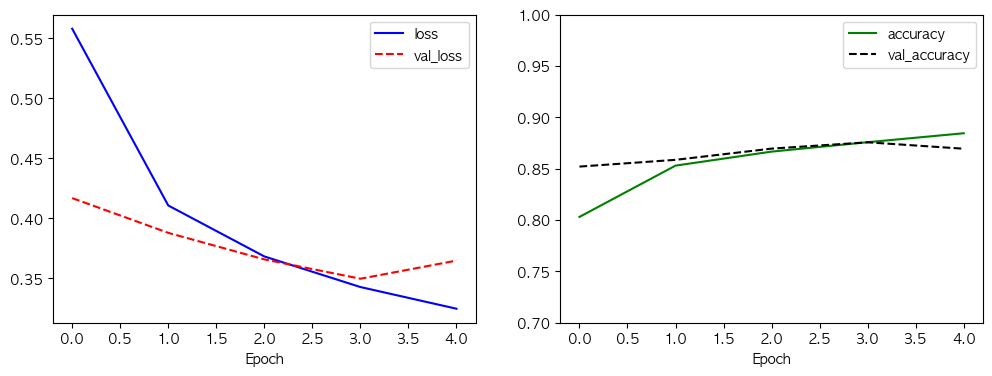

In [145]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

In [146]:
model = keras.Sequential()
model.add(keras.layers.Input((28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [147]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model.fit(train_scaled,
                    train_labels,
                    epochs=5,
                    validation_data=(val_scaled, val_labels),
                    # validation_split=.2
                     )

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.7644 - loss: 0.6759 - val_accuracy: 0.8478 - val_loss: 0.4143
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - accuracy: 0.8550 - loss: 0.4030 - val_accuracy: 0.8652 - val_loss: 0.3782
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - accuracy: 0.8720 - loss: 0.3576 - val_accuracy: 0.8719 - val_loss: 0.3612
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - accuracy: 0.8845 - loss: 0.3356 - val_accuracy: 0.8699 - val_loss: 0.3729
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.8903 - loss: 0.3066 - val_accuracy: 0.8694 - val_loss: 0.3830


In [148]:
history2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

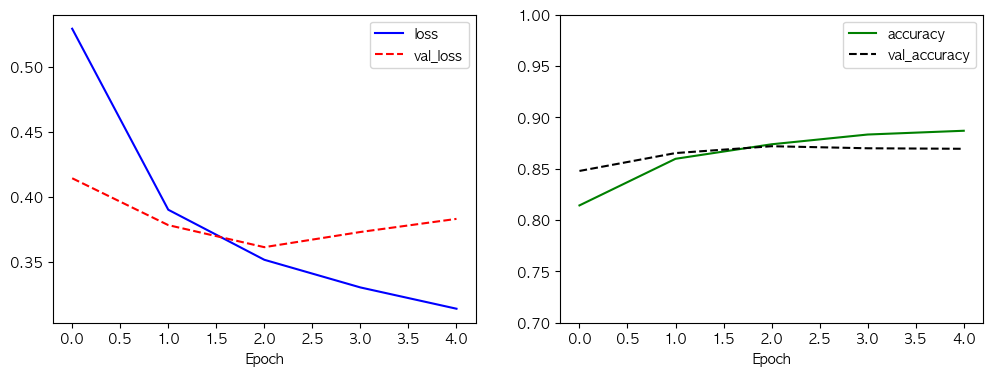

In [149]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], 'b-', label='loss')
plt.plot(history2.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], 'g-', label='accuracy')
plt.plot(history2.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

# 7. 옵티마이저

머신러닝에서 하이퍼파라미터는 모델이 학습하지 않아 사람이 지정해주어야 하는 파라미터라고 얘기했다. 신경망에서 특히 하이퍼파라미터가 많다.

MLP에서 추가할 은닉층의 개수는 모델이 학습하는 것이 아니라 우리가 지정해 주어야 할 하이퍼 파라미터이다. 은닉층의 뉴런 개수도 마찬가지이다.


케라스는 다양한 종류의 경사 하강법 알고리즘을 제공한다. 이들을 옵티마이저라고 부른다. 처음부터 모델을 구성하고 각종 하이퍼파라미터의 최적값을 찾는 것은 어려운 작업이다.

<img src='https://i.imgur.com/YwVJz0a.png'>

compile() 메서드에서는 케라스의 기본 경사 하강법 알고리즘인 RMSprop을 사용했다.
여기서는 여러 가지 옵티마이저를 테스트해 보자.



### - SGD

확률적경사하강법 SGD는 가장 기본 옵티마이저이다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F996AFC3C5B0CF0C901'>(출처: https://twinw.tistory.com/247)

 - 램덤하게 추출한 일부 데이터에 대해 가중치를 조절합니다.
 - 결과적으로 속도는 개선되었지만 최적 해의 정확도는 낮습니다.


In [150]:
# SGD 옵티마이저를 사용하려면 compile() 메서드의 optimizer 매개변수를 'sgd'로 지정한다.
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

이 옵티마이저는 tensorflow,keras.optimizers 패키지 아래 SGD 클래스로 구현되어 있다.

In [151]:
sgd = keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

만약 SGD 클래스의 학습률 기본값이 0.01일 때 이를 바꾸고 싶다면 다음과 같이 원하는 학습률을 learning_rate 매개변수에 지정하여 사용한다.

#### 2) Momentum

모멘텀(momentum)이란 단어는 관성, 탄력, 가속도라는 뜻입니다. 모멘텀 SGD는 경사 하강법에 관성을 더해 주는 것입니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99294C355B0CF0E814'> (출처: https://twinw.tistory.com/247)

경사 하강법과 마찬가지로 매번 기울기를 구하지만, 가중치를 수정하기전 이전 수정 방향(+,-)를 참고하여 같은 방향으로 일정한 비율만 수정되게 하는 방법입니다. 수정이 양(+) 방향, 음(-) 방향 순차적으로 일어나는 지그재그 현상이 줄어들고, 이전 이동 값을 고려해여 일정 비율만큼 다음 값을 결정하므로 관성의 효과를 낼 수 있습니다.



기본 경사 하강법 옵티마이저는 모두 SGD 클래스에서 제공한다. SGD 클래스의 momentum 매개변수에 0보다 큰 값으로 지정하면 마치 이전의 그레이디언트를 가속도처럼 사용하는 모멘텀 최적화를 사용한다. 보통 0.9 이상을 지정한다.

In [152]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### 3) Nesterov Accelrated Gradient(NAG, 네스테로프 모멘텀)

네스테로프 모멘텀은 momentum값과 gradient값이 더해저 실제(actual)값을 만드는 기존 모멘텀과 달리 momentum값이 적용된 지점에서 gradient값이 계산됩니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F996E494B5B0D03A003'>(출처: https://twinw.tistory.com/247)

네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현한다. 대부분의 경우 <u>**네스테로프 모멘텀 최적화가 기본 확률적 경사 하강법보다 더 나은 성능을 제공**</u> 한다.

모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있다. 이렇게 하면 안정적으로 최적점에 수렴할 가능성이 높다. 이런 학습률을 **적응적 학습률** 이라고 한다. 이런 방식들은 학습률 매개변수를 튜닝하는 수고를 덜 수 있는 것이 장점이다.


 아래처럼 SGD 클래스의 nesterov 매개변수를 기본값 False에서 True로 바꾸면 네스테로프 모멘텀 최적화를 사용한다.


#### 3) Adagrad(Adaptive Gradient, 아다그라드)

아다그라드는 변수의 업데이트 횟수에 따라 학습률(Learning rate)를 조절하는 옵션이 추가된 최적화 방법입니다. 여기서 변수란 가중치(W) 벡터의 하나의 값($w_i$)을 말합니다. 아다그라드는 많이 변화하지 않은 변수들은 학습률(step size)를 크게하고, 반대로 많이 변화한 변수들에 대해서는 학습률을 적게합니다. 이는 많이 변화한 변수는 최적값에 근접했을 것이라는 가정하에 작은 크기로 이동하면서 세밀한 값을 조정하고, 반대로 적게 변화한 변수들은 학습률을 크게하여 빠르게 loss값을 줄입니다.

 아다그라드는 같은 입력 데이터가 여러번 학습되는 학습모델에 유용하게 쓰이는데 대표적으로 언어와 관련된 word2vec이나 GloVe에 유용합니다. 이는 학습 단어의 등장 확률에 따라 변수의 사용 비율이 확연하게 차이나기 때문에 많이 등장한 단어는 가중치를 적게 수정하고 적게 등장한 단어는 많이 수정할 수 있기 때문입니다.


keras의 적응적 학습률을 사용하는 대표적인 옵티마이저는 Adagrad와 RMSprop 이다. optimizer 매개변수의 기본값이 바로 rmsprop이다.

In [153]:
adagrad = keras.optimizers.Adagrad(learning_rate=0.001)
model.compile(optimizer=adagrad)

#### 4) RMSprop

적응적 학습률을 사용하는 대표적인 옵티마이저 중 하나. RMSprop은 지수 이동평균을 이용한 방법입니다.  RMSprop(알엠에스프롭)은 아다그라드의 G(t)의 값이 무한히 커지는 것을 방지하고자 제안된 방법으로, 논문과 같은 형태로 발표된 다른 방법들과 달리 제프리 힌튼 교수와 제자들이 코세라(Coursera) 수업에서 소개하였습니다. [링크](https://ko.coursera.org/learn/deep-neural-network/lecture/BhJlm/rmsprop)
- Adagard처럼 그레이디언트 제곱으로 학습률을 나누지만 최근의 그레이디언트를 사용하기 위해 지수 감소를 사용한다.
- learining_rate로 학습률을 지정하며 기본값은 0.001
- rho 매개변수에서 감소 비율을 지정하며 기본값은 0.9

#### 5) Adam

모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adam이다. RMSprop의 특징인 gradient의 제곱을 지수평균한 값을 사용하며 Momentum의 특징으로 gradient를 제곱하지 않은 값을 사용하여 지수평균을 구하고 수식에 활용합니다.

Adam 클래스도 keras.optimizers 패키지 아래에 있다. 적응적 학습률을 사용하는 3개의 클래스는 learning_rate 매개변수의 기본값으로 모두 0.001을 사용한다.


In [154]:
adam = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=adam)

#### 6) AdaDelta(Adaptive Delta)

AdaDelta는 Adagrad, RMSprop, Momentum 모두를 합친 경사하강법이다. [논문 링크](http://www.matthewzeiler.com/wp-content/uploads/2017/07/googleTR2012.pdf)

2가지 특징
 - 첫 번째는 Adagrad 특징인 모든 step의 gradient 제곱의 합을 window size를 두어 window size만큼의 합으로 변경합니다. 이후 RMSprop과 똑같지 지수이동평균을 적용합니다.

 - 두 번째는 헤시안(Hessian) 근사법(Approximation)을 이용한 단위(Units) 수정입니다.


In [155]:
adadelta = keras.optimizers.Adadelta(learning_rate=0.001)
model.compile(optimizer=adadelta)


# 9.Keras 콜백

모든 콜백은 `keras.callbacks.Callback` 클래스를 하위 클래스화하며, 훈련, 테스트 및 예측의 다양한 단계에서 호출되는 메서드 세트를 재정의합니다. 콜백은 훈련 중 모델의 내부 상태 및 통계를 볼 때 유용합니다.

콜백(키워드 인수 callbacks와 같은)의 목록을 다음 모델 메서드에 전달할 수 있습니다.

- keras.Model.fit()
- keras.Model.evaluate()
- keras.Model.predict()


In [156]:
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_images / 255.0

train_scaled, val_scaled, train_labels, val_target = train_test_split(
    train_scaled, train_labels, test_size=0.2, random_state=42)

In [157]:
model = keras.Sequential()
model.add(keras.layers.Input((28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [158]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## PrintDot Callback

In [159]:
class PrintDot(keras.callbacks.Callback):
    """에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다"""
    def on_epoch_end(self, epoch, logs):
        if epoch % 10 == 0:
            print('')
        print('.', end='')


In [76]:
history = model.fit(train_scaled,
                    train_labels,
                    epochs=30,
                    validation_split=0.25,
                    verbose=0,
                    callbacks=[PrintDot()]
                    )


..........
..........
................
..........

In [77]:
print("\검증 데이터로 모델 평가:")
loss, accuracy = model.evaluate(val_scaled, val_target)
print(f"테스트 손실: {loss:.4f}")
print(f"테스트 정확도: {accuracy:.4f}")

\검증 데이터로 모델 평가:
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.8829 - loss: 0.4154
테스트 손실: 0.4113
테스트 정확도: 0.8815


## TqdmCallback

Tqdm 과 Keras Integration

https://github.com/tqdm/tqdm/#installation


```bash
pip install tqdm

conda install -c conda-forge tqdm
```

TQDM을 Jupyter notebook 에 표시하기 위해서 ipywidgets 도 설치한다.

In [78]:
%pip install tqdm ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [79]:
from tqdm import tqdm
from time import sleep

text = ""
for char in tqdm(["a", "b", "c", "d"]):
    sleep(0.25)
    text = text + char

100%|██████████| 4/4 [00:01<00:00,  3.94it/s]


keras.fit() 메서드 verbose=0 으로 지정하고  callback 매개변수에 TqdmCallback을 사용해 Tqdm으로 출력

```python
from tqdm.keras import TqdmCallback

model.fit(..., verbose=0, callbacks=[TqdmCallback()])
```

In [80]:
model = keras.Sequential()
model.add(keras.layers.Input((28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tqdm.keras import TqdmCallback

history = model.fit(train_scaled,
                    train_labels,
                    epochs=30,
                    validation_split=0.25,
                    verbose=1,
                    callbacks=[TqdmCallback()]
                    )

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.7581 - loss: 0.7073 - val_accuracy: 0.8494 - val_loss: 0.4342
Epoch 2/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.8486 - loss: 0.4286 - val_accuracy: 0.8528 - val_loss: 0.4122
Epoch 3/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.8670 - loss: 0.3736 - val_accuracy: 0.8429 - val_loss: 0.4431
Epoch 4/30
 163/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.8647 - loss: 0.3715

In [166]:
print("\검증 데이터로 모델 평가:")

print(f"테스트 손실: {loss:.4f}")
print(f"테스트 정확도: {accuracy:.4f}")

\검증 데이터로 모델 평가:
테스트 손실: 0.4071
테스트 정확도: 0.8815


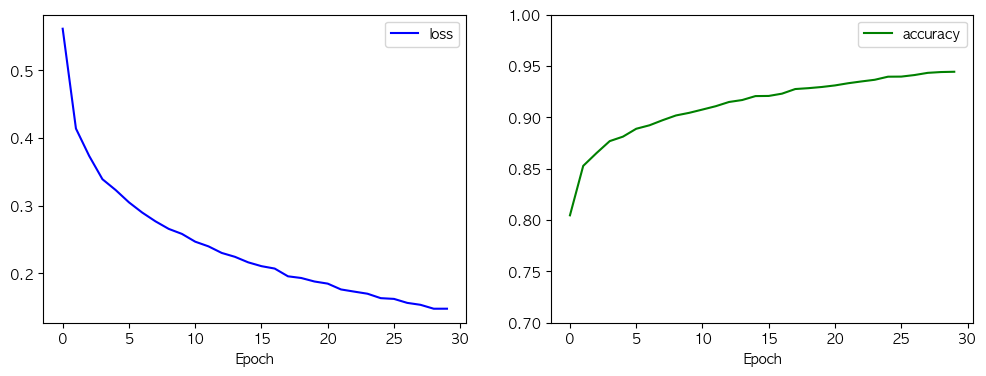

In [167]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
# plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
# plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

---

# 참고
 - 혼자하는 MDL/chapter.7 딥러닝을 시작합니다
 - [경사하강법 설명](https://twinw.tistory.com/247)

